# Final Project
## Import dataset from Kaggle
- https://www.kaggle.com/c/datasciencebootcamp/data<br><br>
This data captures performance of randomly selected students. The data attributes include student grades, demographic, social and school related features). The student performance data has been split into two groups, a 'training set' titled train.csv and a 'test set' titled as test.csv above. For the training set, we provide the outcome ('score') for each student. You will use this set to build your model to generate predictions for the test set.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from bokeh.io import output_notebook, show, push_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral7
from bokeh.models import FactorRange
from bokeh.transform import factor_cmap

from math import pi

from bokeh.io import output_file
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.layouts import gridplot

from bokeh.plotting import show
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from sklearn import svm, datasets

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import decomposition
from sklearn.decomposition import PCA

import pylab as pl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz 

import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

output_notebook()

# import the train data set
df = pd.read_csv('train.csv')
df.head()

Loading BokehJS ...

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


- S/N – student number (nominal)

- Gender - student's gender (binary: 'F' - female or 'M' - male)

- Age - student's age (numeric: from 10 to 17)

- Location - Student's home address type (binary: 'U' - urban or 'R' - rural)

- famsize - Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

- Pstatus - Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

- Medu - mother's education (numeric: 0 - none, 1 – Lower Primary 2 Upper Primary to JSS3, 3 SSCE level or 4 Higher education)

- Fedu - Father's education (numeric: 0 - none, 1 – Lower Primary 2 Upper Primary to JSS3, 3 SSCE level or 4 Higher education)

- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

- failures - number of past class failures (numeric: n if 1<=n<=3, else 4)

- schoolsup - extra educational support (binary: yes or no)

- famsup - family educational support (binary: yes or no)

- paid - extra paid classes within the course subject (binary: yes or no)

- activities - extra-curricular activities (binary: yes or no)

- nursery - attended nursery school (binary: yes or no)

- higher - wants to take higher education (binary: yes or no)

- internet - Internet access at home (binary: yes or no)

- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

- freetime - free time after school (numeric: from 1 - very low to 5 - very high)

- health - current health status (numeric: from 1 - very bad to 5 - very good)

- absences - number of school absences (numeric: from 0 to 93)

- Scores (numeric, 0-60)

## Preprocessing
- modify all binary field values into 0 and 1

In [48]:
def refresh():
    # Gender
    df.loc[df.Gender == 'F', 'Gender']= 0
    df.loc[df.Gender == 'M', 'Gender']= 1
    # Location
    df.loc[df.Location == 'U', 'Location']= 0
    df.loc[df.Location == 'R', 'Location']= 1
    # famsize
    df.loc[df.famsize == 'LE3', 'famsize']= 0
    df.loc[df.famsize == 'GT3', 'famsize']= 1
    # Pstatus
    df.loc[df.Pstatus == 'T', 'Pstatus']= 0
    df.loc[df.Pstatus == 'A', 'Pstatus']= 1
    #schoolsup
    df.loc[df.schoolsup == 'yes', 'schoolsup']= 0
    df.loc[df.schoolsup == 'no', 'schoolsup']= 1
    #famsup
    df.loc[df.famsup == 'yes', 'famsup']= 0
    df.loc[df.famsup == 'no', 'famsup']= 1
    #paid
    df.loc[df.paid == 'yes', 'paid']= 0
    df.loc[df.paid == 'no', 'paid']= 1
    #activities
    df.loc[df.activities == 'yes', 'activities']= 0
    df.loc[df.activities == 'no', 'activities']= 1
    #nursery
    df.loc[df.nursery == 'yes', 'nursery']= 0
    df.loc[df.nursery == 'no', 'nursery']= 1
    #higher
    df.loc[df.higher == 'yes', 'higher']= 0
    df.loc[df.higher == 'no', 'higher']= 1
    #internet
    df.loc[df.internet == 'yes', 'internet']= 0
    df.loc[df.internet == 'no', 'internet']= 1
    df.head()
refresh()

In [49]:
# check if there's null value
df[df.isnull().values==True]

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score


In [50]:
# check if there's null value
df[df.isna().values==True]

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score


In [51]:
df.describe()

,S/N,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


## Visualization

In [52]:
# age distribution
df[{'Age'}].apply(pd.value_counts)

,Age
11,112
10,86
12,77
13,41
14,7
17,1
15,1


In [79]:
from bokeh.palettes import Spectral7
# from bokeh.transform import factor_cmap

fruits = ['10', '11', '12', '13', '14', '15','17']
counts = [86, 112, 77, 41, 7, 1, 1]
source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))
colors = [ "salmon", "olive", "darkred", "goldenrod", "skyblue", "orange"]

p = figure(x_range=fruits, y_range=(0,130), plot_height=350, title="Age Distribution",tools="")

p.vbar(x='fruits', top='counts', source=source, width=0.9, alpha = 0.8,
       color = factor_cmap('fruits', palette=Spectral7, factors=fruits),legend_field="fruits")


p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [54]:
# count for all binary values
df[{'Gender','Location','famsize','Pstatus','schoolsup','famsup','paid','activities',
    'nursery','higher','internet'}].apply(pd.value_counts)

,activities,Gender,schoolsup,famsize,higher,paid,internet,Location,famsup,Pstatus,nursery
0,171,171,52,91,297,21,268,265,206,285,255
1,154,154,273,234,28,304,57,60,119,40,70


In [55]:
def pieChart(x, title):

    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Gender'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = palette[:len(x)]

    p = figure(plot_height=200, title=title, toolbar_location=None,
               tools="hover", tooltips="@Gender: @value", x_range=(-0.5, 1.0))

    p.wedge(x=0, y=1, radius=0.2, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend_field='Gender', source=data)

    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None
    
    return p

In [56]:
palette = ['#225ea8', '#41b6c4', '#35B778','#a1dab4', '#FDE724']


# # create three plots
p1 = pieChart({'Female': 171, 'Male':154}, "Gender Distribution")


p2 = pieChart({'Urban': 265, 'Rural': 60}, "House Location")

p3 = pieChart({'Less than 3': 91,'Greater than 3': 234}, "Family Size")

p4 = pieChart({'Together': 285,'Apart': 40}, "Parent Status")

p5 = pieChart({'Yes': 52,'No': 273}, "School Support")

p6 = pieChart({'Yes': 206,'No': 119}, "Family Support")

p7 = pieChart({'Yes': 21,'No': 304}, "Paid Classes")

p8 = pieChart({'Yes': 171,'No': 154}, "Extra-curricular Activities")

p9 = pieChart({'Yes': 255,'No': 70}, "Nursery School")

p10 = pieChart({'Yes': 297,'No': 28}, "Want Higher Education")

p11 = pieChart({'Yes': 268,'No': 57}, "Internet Access")


# make a grid
grid = gridplot([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11], ncols=4, plot_width=250, plot_height=250)

show(grid)

In [57]:
#count for education(0-4)
edu=df[{'Fedu','Medu'}].apply(pd.value_counts)
edu

,Medu,Fedu
0,2,2
1,48,71
2,96,98
3,75,78
4,104,76


In [58]:
education = ['None', 'Low Primary', 'UpperPrimarytoJSS3', 'SSCE Level', 'Higher Education']
parent = ['Father', 'Mother']

#numeric: 0 - none, 1 – Lower Primary 2 Upper Primary to JSS3, 3 SSCE level or 4 Higher education

data = {'education' : education,
        'Father'   : [2, 71, 98, 78, 76],
        'Mother'   : [2, 48, 96, 75, 104]}

x = [(edu, pa) for edu in education for pa in parent]
counts = sum(zip(data['Father'], data['Mother']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=300, title="Parent Education Level Distribution")

p.vbar(x='x', top='counts', width=0.9, source=source, 
       fill_color=factor_cmap('x',palette=palette[:2], factors=parent, start = 1, end = 2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


show(p)

In [59]:
#count for time and failure(1-4)
df[{'studytime','traveltime','failures'}].apply(pd.value_counts)

,traveltime,failures,studytime
0,NaN,287.0,NaN
1,215.0,24.0,96.0
2,83.0,6.0,167.0
3,18.0,8.0,42.0
4,9.0,NaN,20.0


In [60]:
# # create three plots

p1 = pieChart({'< 15min': 215,'15 - 30min': 83, '30min - 1hr':18, '> 1hr': 9}, "Travel Time")

p2 = pieChart({'< 2hr': 96, '2 - 5hr': 167, '5 - 10hr': 42, '> 10hr': 20}, "Study Time")

p3 = pieChart({'0': 287,'1': 24,'2': 6, '3': 8}, "Class Failures")

# make a grid
grid = gridplot([p1, p2, p3], ncols=3, plot_width=300, plot_height=300)

show(grid)

In [61]:
#count for famrel,freetime,health(1-5)
df[{'famrel','freetime','health'}].apply(pd.value_counts)

,freetime,famrel,health
1,16,7,45
2,56,15,31
3,137,61,66
4,86,154,53
5,30,88,130


In [62]:
p1 = pieChart({'Very bad': 7,'Below average': 15, 'Average':61, 'Above average': 154,'Excellent': 88}, "Family Relationships")

p2 = pieChart({'Very low': 16,'Below average': 56, 'Average':137, 'Above average': 86,'Very high': 30}, "Free Time")

p3 = pieChart({'Very bad': 45,'Below average': 31, 'Average':66, 'Above average': 53,'Very good': 130}, "Health Status")

# make a grid
grid = gridplot([p1, p2, p3], ncols=3, plot_width=300, plot_height=300)

show(grid)

In [63]:
age_studytime = df.groupby('Age').agg({'studytime': [np.mean], 'traveltime': [np.mean]})
age_studytime

,studytime,traveltime
,mean,mean
Age,,
10,2.116279,1.383721
11,1.866071,1.437500
12,1.922078,1.532468
13,1.926829,1.536585
14,2.142857,1.000000
15,2.000000,2.000000
17,1.000000,1.000000


In [64]:
age = ['10', '11', '12', '13', '14', '15', '17']
time = ['travel', 'study']

data = {'age' : age,
        'travel'   : [1.38, 1.43, 1.53, 1.53, 1, 2, 1],
        'study'   : [2.11, 1.86, 1.92,1.92, 2.14, 2.00, 1.00]}

x = [(ag, ti) for ag in age for ti in time]
counts = sum(zip(data['travel'], data['study']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=300, title="Mean Travel Time and Study Time of Each Age Group")

p.vbar(x='x', top='counts', width=0.9, source=source, 
       fill_color=factor_cmap('x', palette=palette[:2], factors=time, start = 1, end = 2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


show(p)

In [65]:
p = figure(title = "Absences Distribution")
p.xaxis.axis_label = 'S/N'
p.yaxis.axis_label = 'absences'

p.scatter('S/N','absences', source=df, fill_alpha=0.4, size=10,

          color='skyblue')

show(p)

In [66]:
p = figure(title = "Score Distribution")
p.xaxis.axis_label = 'S/N'
p.yaxis.axis_label = 'Score'

p.scatter('S/N','Score', source=df, fill_alpha=0.7, size=10,

          color='skyblue')

show(p)

## PCA Analysis

In [98]:
# load decomposition to do PCA analysis with sklearn
# classify students according to score
X1 = df.iloc[:,0:22]
Y1 = df.iloc[:,22:23]

Y1.loc[(df.Score >= 50),'Score']=3
Y1.loc[(df.Score < 50)&(df.Score >= 40),'Score']=2
Y1.loc[(df.Score < 40)&(df.Score >= 30),'Score']=1
Y1.loc[(df.Score < 30)&(df.Score >= 20),'Score']=0

print(X1.shape)

(325, 22)


In [99]:
X = df.iloc[:,1:].values
pca = PCA(n_components=22)
pca.fit(X)
PCA(n_components=22)
print(pca.explained_variance_ratio_)

[0.58185741 0.29391324 0.02560652 0.02277667 0.01315909 0.01262053
 0.008949   0.00790894 0.00605604 0.00522542 0.00315594 0.00308038
 0.00257876 0.00245702 0.00218251 0.00182549 0.00169355 0.00130716
 0.00127503 0.00109632 0.00065705 0.0006179 ]


In [100]:
print(pca.singular_values_)

[125.23589393  89.00821927  26.27216448  24.77796681  18.83360362
  18.44418189  15.5312961   14.6009041   12.77659007  11.86810206
   9.22327127   9.11219177   8.33731549   8.13814081   7.6700495
   7.01472209   6.75646622   5.93588113   5.86247476   5.43612728
   4.20843672   4.08112687]


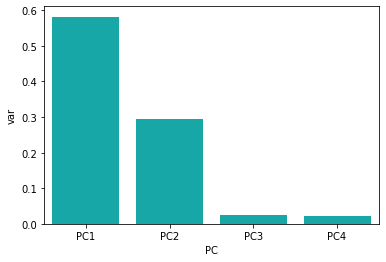

In [101]:
pcaDf = pd.DataFrame({'var':pca.explained_variance_ratio_[:4],
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=pcaDf, color="c");

In [107]:
## the scree plot is at PC2 
# Compute (one-dimensional) PCA on the digits dataset
pca1 = decomposition.PCA(n_components=2)
X1 = pca1.fit(X)

print(pca1.explained_variance_ratio_)

[0.66690694 0.00305712]


## Linear Regression

In [108]:
# assign6 linear regression.
features = df.iloc[:,0:22]
features

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,1,0,13,0,1,1,4,4,2,2,...,1,1,1,0,0,1,4,3,3,4
1,2,0,12,0,1,0,1,1,1,2,...,0,1,1,1,0,0,5,3,3,2
2,3,0,10,0,0,0,1,1,1,2,...,1,1,1,0,0,0,4,3,3,6
3,4,0,10,0,1,0,4,2,1,3,...,0,1,0,0,0,0,3,2,5,0
4,5,0,11,0,1,0,3,3,1,2,...,0,1,1,0,0,1,4,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,0,13,0,1,0,4,4,1,2,...,0,1,0,0,0,0,2,4,4,2
321,322,0,12,0,1,0,2,2,3,3,...,0,1,1,0,0,0,4,2,1,8
322,323,0,14,1,1,0,3,2,1,2,...,0,1,1,0,1,0,3,3,3,0
323,324,1,13,0,0,0,4,3,2,1,...,1,1,0,0,0,0,4,2,1,0


In [109]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()
    

Populating the interactive namespace from numpy and matplotlib


/Users/jin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'pi', 'source', 'show', 'figure', 'grid', 'cumsum', 'interp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


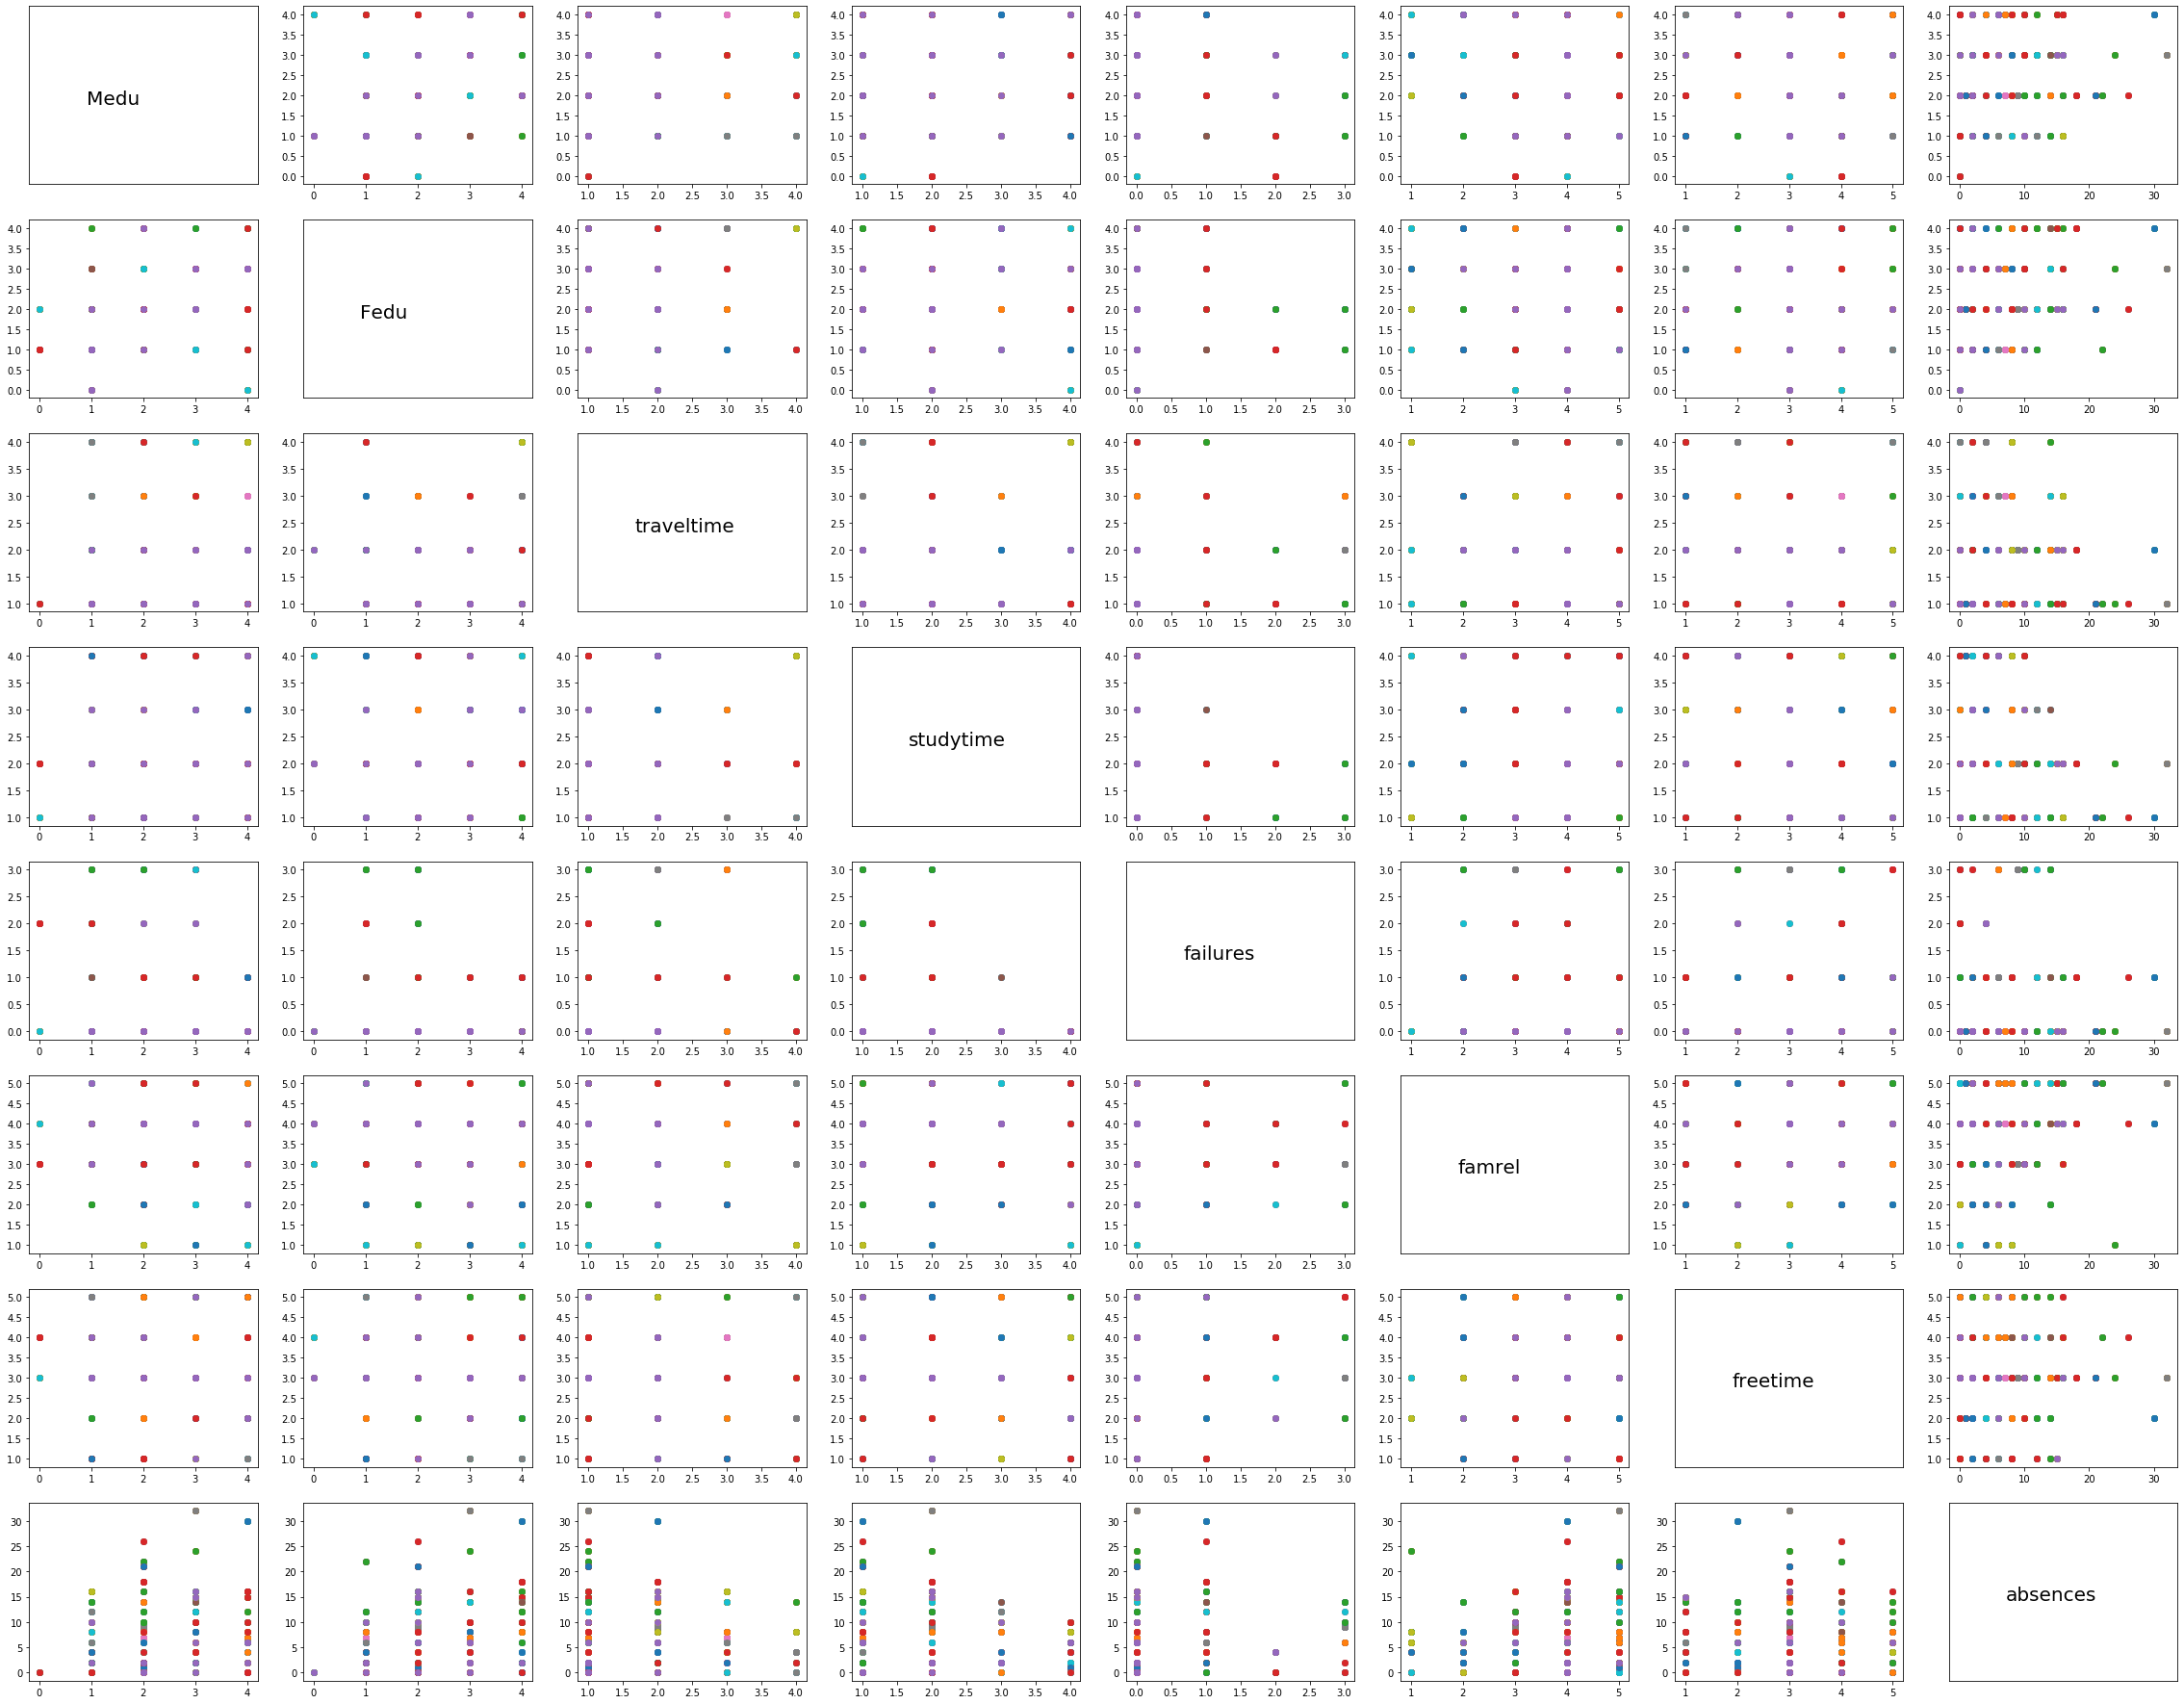

In [110]:
pic = df.loc[:,['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','absences','Score']]
pairs(pic)

In [111]:
x = df.iloc[:,0:22]
y = df.iloc[:,22:23]

In [112]:
from sklearn import datasets,linear_model,discriminant_analysis
import numpy as np
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients:%s,intercept %.2f' % (regressor.coef_, regressor.intercept_))
print("Residual sum of square:%.2f" % np.mean((regressor.predict(x_test) - y_test) ** 2))
print('Score:%.2f' % regressor.score(x_test, y_test))

Coefficients:[[ 0.00543399 -2.09072759 -0.68680875 -0.84491467 -0.28948699  0.25129992
   0.22565255  0.47219043 -0.46717266  0.73100202 -2.93657647  3.69332857
  -0.91922025  2.44564506 -3.24448401  0.34438967 -3.78832154  0.1907308
  -0.26113263  0.24271883 -0.65641824 -0.22571338]],intercept 42.04
Residual sum of square:38.10
Score:0.14


In [113]:
y_pred = regressor.predict(x_test)
y_pred = np.round(y_pred)

contrast = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})
contrast

,Actual,Predicted
0,23,27.0
1,47,42.0
2,51,37.0
3,35,44.0
4,43,38.0
...,...,...
77,36,33.0
78,32,33.0
79,39,40.0
80,47,31.0


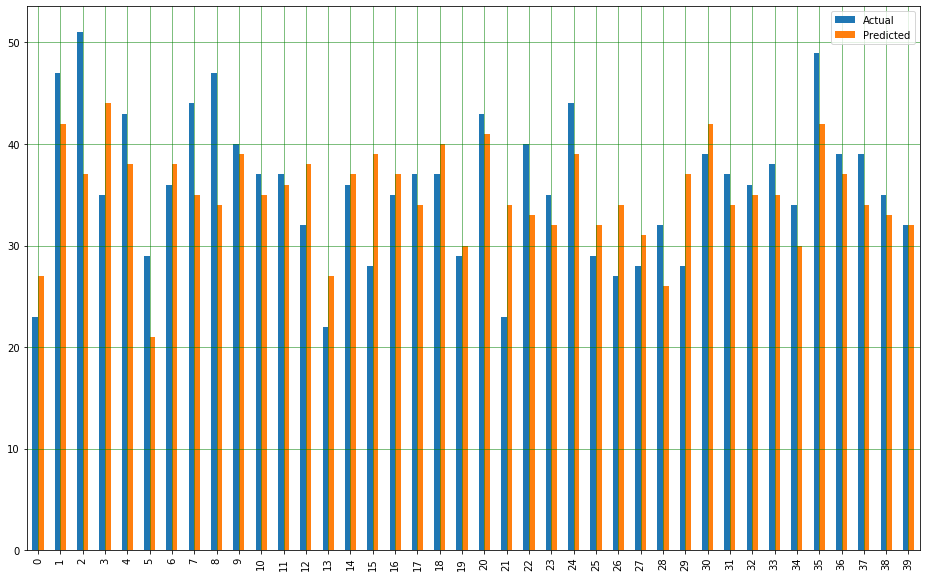

In [114]:
contrast1 = contrast.head(40)
contrast1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.853658536585366
Mean Squared Error: 38.02439024390244
Root Mean Squared Error: 6.16639199564076


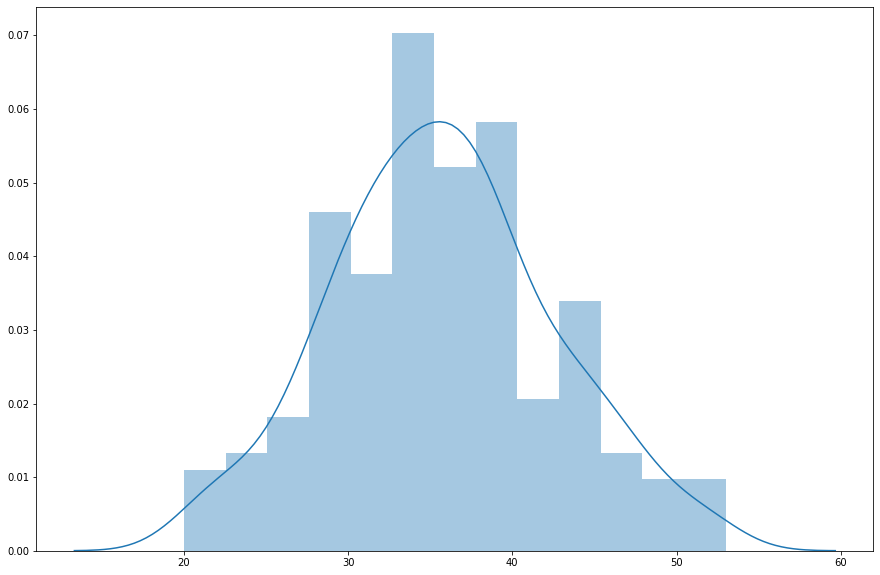

In [116]:
### distribution of Score 
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

In [117]:
x = df.iloc[:,0:22].columns
x = np.array(x)
x
# regressor.coef_
coeff_df = pd.DataFrame({"variable":x.flatten(), "Coefficient":regressor.coef_.flatten()})  
coeff_df

,variable,Coefficient
0,S/N,0.005434
1,Gender,-2.090728
2,Age,-0.686809
3,Location,-0.844915
4,famsize,-0.289487
5,Pstatus,0.251300
6,Medu,0.225653
7,Fedu,0.472190
8,traveltime,-0.467173
9,studytime,0.731002


In [118]:
from sklearn.linear_model import LogisticRegression
x = df.iloc[:,0:22]
y = df.iloc[:,22:23]
eightyPercentileScore = np.percentile(y, [25,50,75])
eightyPercentileScore

array([31., 36., 40.])

## Decision Tree

In [128]:
# classify students according to score
data = df.iloc[:,1:22]
target = df.iloc[:,22:23]

target.loc[(df.Score >= 50),'Score']=3
target.loc[(df.Score < 50)&(df.Score >= 40),'Score']=2
target.loc[(df.Score < 40)&(df.Score >= 30),'Score']=1
target.loc[(df.Score < 30)&(df.Score >= 20),'Score']=0

#check if miss classifying any value
df['Score'].isna().sum()

0

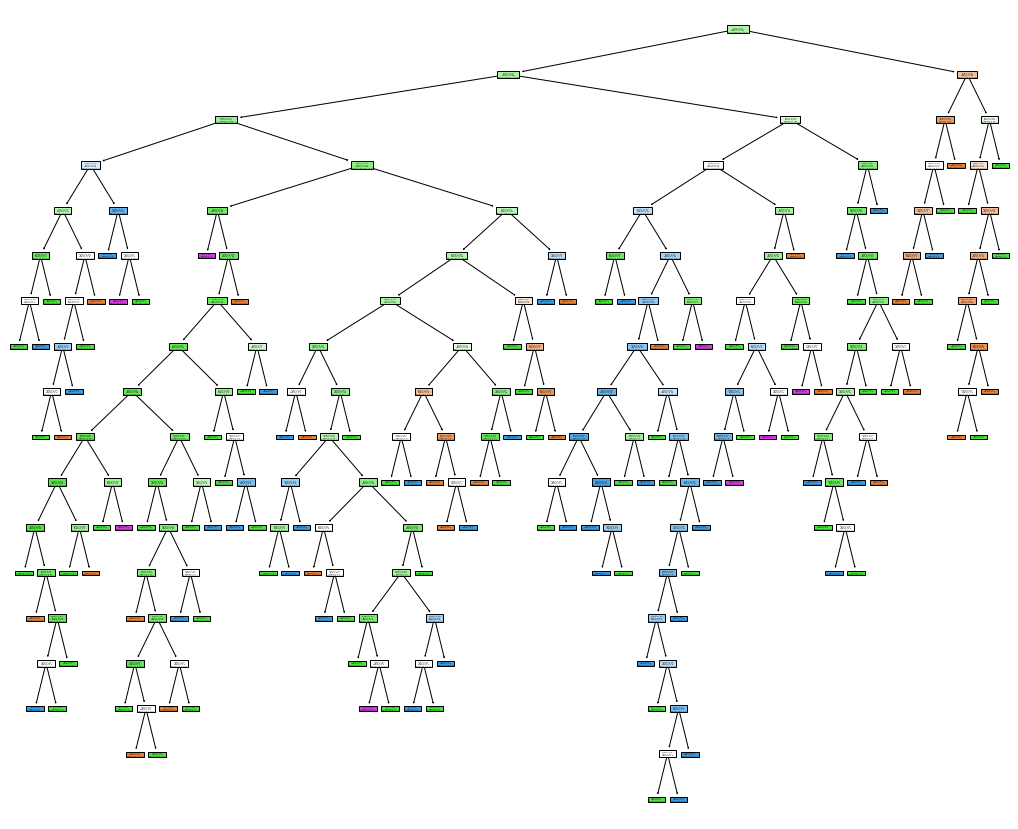

In [129]:
X = data
y = target

plt.figure(figsize=(18, 15))
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()

In [130]:
# export tree as Tree.pdf
feature_names=df.columns.values[1:22]
target_names=['1','2','3','4']

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Tree")
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,
                                class_names=target_names,filled=True, rounded=True, special_characters=True) 

In [131]:
# prediction with the decision tree model
case_1=clf.predict([[0,17,0,1,1,3,0,2,2,0,3,0,0,1,0,1,1,0,3,2,3]])
print(case_1)

[3]


In [132]:
case_2=clf.predict([[0,14,1,0,0,4,1,1,2,1,4,0,1,0,1,0,1,1,1,2,4]])
print(case_2)

[1]


## Model Evaluation

In [119]:
from sklearn.linear_model import LogisticRegression
x = df.iloc[:,0:22]
y = df.iloc[:,22:23]
eightyPercentileScore = np.percentile(y, [25,50,75])

y.loc[(y.Score<=31),'Score']=0
y.loc[(y.Score>31) & (y.Score<40),'Score']=1
y.loc[(y.Score>=40),'Score']=2

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)
# Create a simple Logistic Regression classifier. 
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train.values.ravel())
y_pred = clf.predict(x_test)

In [120]:
print("accuracy Score:%.2f" %accuracy_score(y_test,y_pred))

accuracy Score:0.53


In [121]:
target_names = ['type0','type1','type2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       type0       0.55      0.48      0.51        25
       type1       0.57      0.67      0.62        49
       type2       0.39      0.29      0.33        24

    accuracy                           0.53        98
   macro avg       0.50      0.48      0.49        98
weighted avg       0.52      0.53      0.52        98



Confusion matrix, without normalization
[[12 11  2]
 [ 7 33  9]
 [ 3 14  7]]
Normalized confusion matrix
[[0.48 0.44 0.08]
 [0.14 0.67 0.18]
 [0.12 0.58 0.29]]


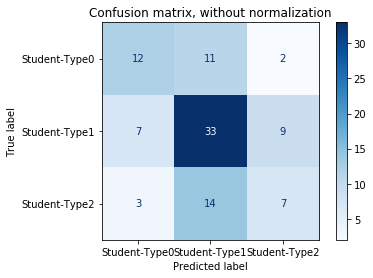

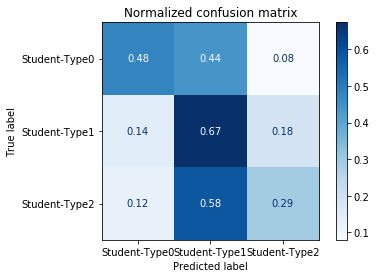

In [122]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(x_train, y_train.values.ravel())

class_names = ['Student-Type0','Student-Type1','Student-Type2']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [123]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [124]:
x = df.iloc[:,0:22]
y = df.iloc[:,22:23]
y.loc[(y.Score<=31),'Score']=0
y.loc[(y.Score>31) & (y.Score<40),'Score']=1
y.loc[(y.Score>=40),'Score']=2
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

y_pred

array([0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 0, 0, 1, 1])

In [125]:
X = df.iloc[:,0:22]
y = df.iloc[:,22:23]
y.loc[(y.Score<=31),'Score']=0
y.loc[(y.Score>31) & (y.Score<40),'Score']=1
y.loc[(y.Score>=40),'Score']=2

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/Users/jin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


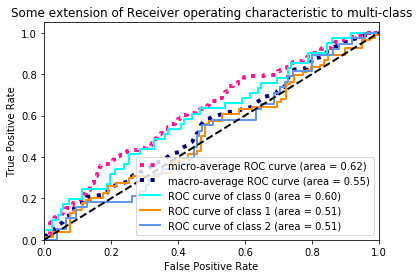

<Figure size 1440x1440 with 0 Axes>

In [126]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
from itertools import cycle
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.figure(figsize=(20,20)) 
plt.show()

Average precision score, micro-averaged over all classes: 0.45


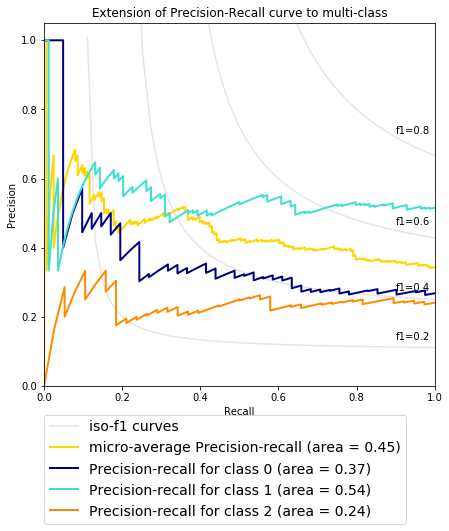

In [127]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()

### Reference
[1]https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f<br>
[2]https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/<br>
[3]https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.htmlhighlight=decision%20tree%20classifier#sklearn.tree.DecisionTreeClassifier<br>
[4]https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html<br>